# Gram continuation

In [99]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy

nD    = 12
nd    = 28 
g     = 63 
Gamma = 150 
F = np.fromfile(f"/home/calab912/Documents/fdm-hybrid-scheme/demonstration/nD={nD}_nd={nd}_g={g}_Gamma={Gamma}.bin").reshape(nD * 2, 2 * nD + 2 * nd - 4) 
Fe = F[:nD, :]
Fo = F[nD:, :]
Pl = np.fromfile(f"/home/calab912/Documents/fdm-hybrid-scheme/demonstration/Pleft_nD={nD}.bin").reshape(nD, nD) 
Pr = np.fromfile(f"/home/calab912/Documents/fdm-hybrid-scheme/demonstration/Pright_nD={nD}.bin").reshape(nD, nD) 


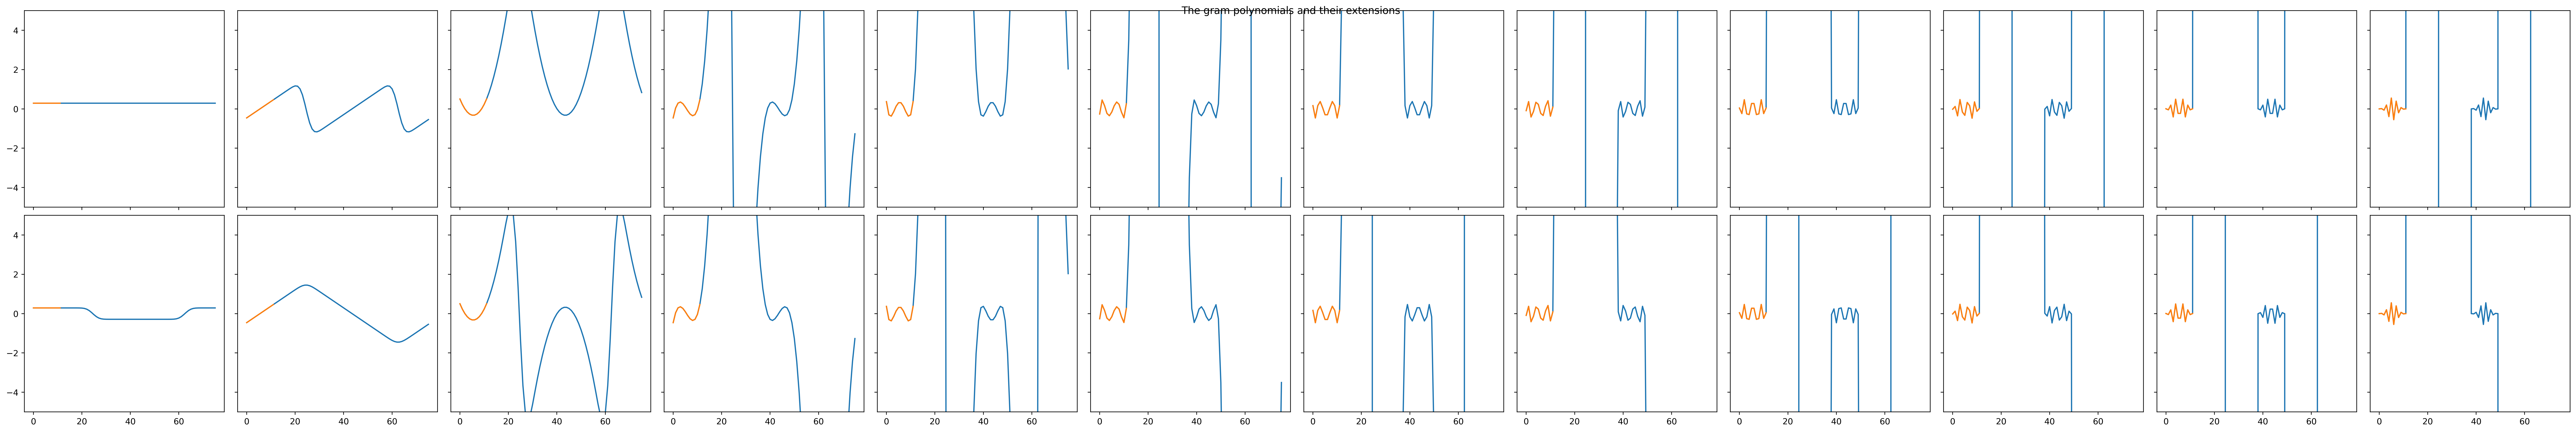

In [101]:
fig, axs = plt.subplots(2, nD, sharex=True, sharey=True, figsize=(3.54 * nD, 3.54*2), dpi=400)
fig.suptitle("The gram polynomials and their extensions")
fig.tight_layout(pad=0.0)
for i in range(nD):
    axs[1, i].set_ylim(-5, 5)
    axs[1, i].plot(Fo[i, :])
    axs[1, i].plot(Pr[i, :])
    axs[0, i].set_ylim(-5, 5)
    axs[0, i].plot(Fe[i, :])
    axs[0, i].plot(Pr[i, :])
plt.show()

[ 3.46106250e+00+1.22863465e-01j -2.73660520e-03+7.70901390e-02j
 -7.59756565e-04-2.69704244e-05j  1.70871502e-07-4.81344838e-06j
  2.21327955e-08+7.85687040e-10j -2.77877721e-12+7.82772111e-11j
 -2.19609487e-13-7.79237785e-15j  0.00000000e+00-4.92661467e-16j
  1.06468653e-16+3.46944695e-18j  0.00000000e+00+0.00000000e+00j
  7.28583860e-17+3.46944695e-18j -2.22044605e-16+0.00000000e+00j] [ 3.41648088e+00+5.67192594e-01j -1.26333910e-02+7.60971482e-02j
 -7.49970213e-04-1.24507517e-04j  7.88819119e-07-4.75144680e-06j
  2.18477051e-08+3.62708208e-09j -1.28278499e-11+7.72689412e-11j
 -2.16619257e-13-3.59885732e-14j  0.00000000e+00-4.71844785e-16j
  2.00360561e-16+2.08166817e-17j -1.11022302e-16+0.00000000e+00j
  9.54097912e-17+2.08166817e-17j  0.00000000e+00-2.77555756e-17j]


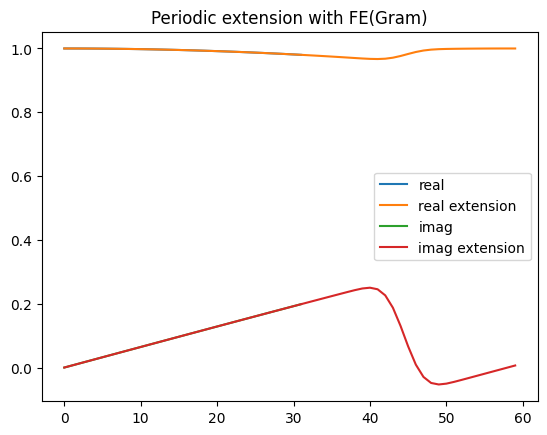

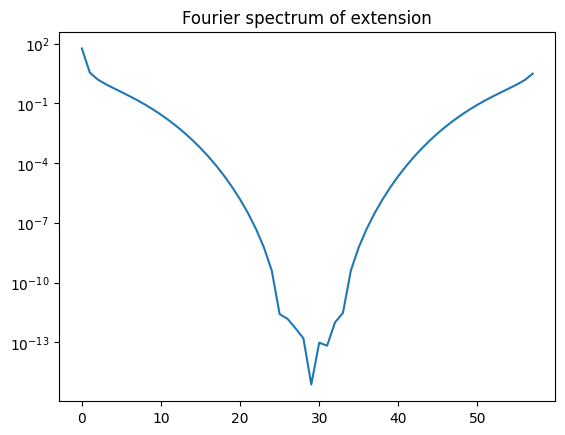

In [102]:

n      = 10 
nDelta = nD 

n = 32
x = np.linspace(0, 0.2, n)

leftBoundary  = x[       :nDelta]
rightBoundary = x[-nDelta:      ]

f = np.exp(1j*1*x)

fl = f[:nDelta]
fr = f[-nDelta:]

al     = Pl @ fl 
ar     = Pr @ fr
m      = 5

print(al, ar)

al[m+1:] = 0
ar[m+1:] = 0
fpl    = al @ Pl 
fpr    = ar @ Pr 
fmatch = (al + ar)/2 @ Fe + (ar - al)/2 @ Fo

fdp = np.concatenate([fpl, f[nDelta:-nDelta], fpr, fmatch[nDelta:nDelta + nd]])

plt.title("Periodic extension with FE(Gram)")
plt.plot(f.real, label="real")
plt.plot(fdp.real, label="real extension")
plt.plot(f.imag, label="imag")
plt.plot(fdp.imag, label="imag extension")
plt.legend()
plt.show()

plt.title("Fourier spectrum of extension")
plt.yscale("log")
plt.plot(np.abs(scipy.fft.fft(fdp[:-2])))
plt.show()